In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
sample=pd.read_csv('/kaggle/input/aviakompaniya/sample_submission.csv')
test=pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')
train=pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv')

In [4]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [5]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [6]:
test_id=pd.DataFrame(test['id'])

In [7]:
train.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [8]:
test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

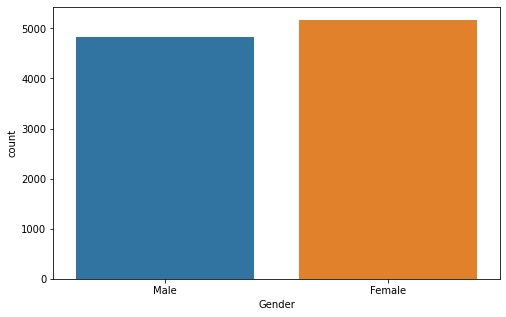

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',data= train)
plt.show()

In [11]:
train.replace({'Male':1,'Female':0},inplace=True)
train.replace({'Male':1,'Female':0},inplace=True)
train.replace({'Male':1,'Female':0},inplace=True)

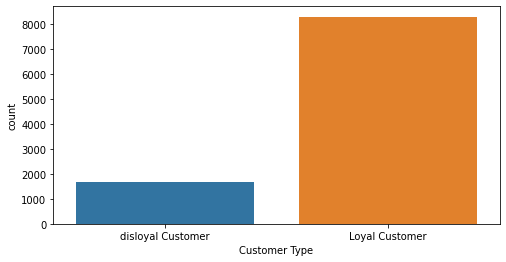

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='Customer Type',data= train)
plt.show()

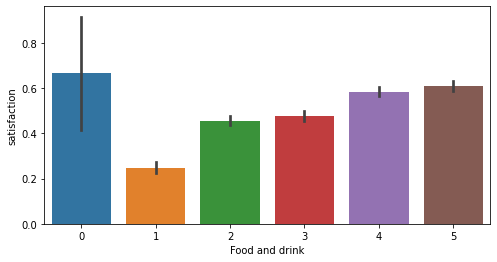

In [13]:
plt.figure(figsize=(8,4))
sns.barplot(x='Food and drink',y='satisfaction',data= train)
plt.show()

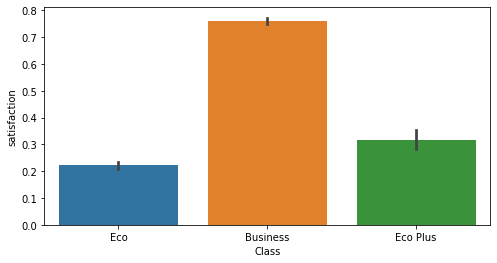

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(x= 'Class', y= 'satisfaction', data= train)
plt.show()

In [15]:
bins=[0,18,33,55,81]
guruh=['bolalar','yoshlar','kattalar','qariyalar']
groups=pd.cut(train.Age,bins,labels=guruh)
train['guruh']=groups
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,guruh
0,1,1,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,3,1,3,4,3,4,10,3.0,0,yoshlar
1,2,0,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,3,5,3,0,0.0,1,kattalar
2,3,0,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,2,0,18.0,0,kattalar
3,4,0,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,4,4,5,5,4,2,0,0.0,1,yoshlar
4,5,1,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,5,2,5,3,5,4,0,10.0,0,bolalar


In [16]:
train.corrwith(train['satisfaction']).abs().sort_values()

Gender                               0.002601
id                                   0.002931
Gate location                        0.007169
Departure Delay in Minutes           0.042960
Arrival Delay in Minutes             0.048650
Departure/Arrival time convenient    0.067638
Age                                  0.144302
Ease of Online booking               0.164662
Food and drink                       0.207854
Checkin service                      0.232359
Inflight service                     0.240584
Baggage handling                     0.247965
Inflight wifi service                0.277395
Flight Distance                      0.298703
Cleanliness                          0.310338
Leg room service                     0.324368
On-board service                     0.326426
Seat comfort                         0.342294
Inflight entertainment               0.400900
Online boarding                      0.504986
satisfaction                         1.000000
dtype: float64

In [17]:
train.drop('Gate location',axis=1,inplace=True)
test.drop('Gate location',axis=1,inplace=True)

In [18]:
train['Arrival Delay in Minutes'].fillna(train['Departure Delay in Minutes'],inplace=True)
test['Arrival Delay in Minutes'].fillna(test['Departure Delay in Minutes'],inplace=True)

In [19]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'guruh'],
      dtype='object')

In [20]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [21]:
train.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
guruh                                0
dtype: int64

In [22]:
train.groupby('satisfaction').mean().T

satisfaction,0,1
Gender,0.4844,0.4818
Age,37.2254,41.5248
Flight Distance,924.2128,1534.8996
Inflight wifi service,2.4022,3.1582
Departure/Arrival time convenient,3.1684,2.9618
Ease of Online booking,2.5638,3.0318
Food and drink,2.9374,3.4916
Online boarding,2.6660,4.0322
Seat comfort,3.0426,3.9402
Inflight entertainment,2.8690,3.9368


# Machine Learning

In [23]:
X=train.drop('satisfaction',axis=1)
y=np.asanyarray(train[['satisfaction']])

In [24]:
cat_attr=[ 'Gender','Customer Type','Type of Travel', 'Class']
num_attr=[ 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
        'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

full_pip=ColumnTransformer([
    ('num',StandardScaler(),num_attr),
    ('cat',OrdinalEncoder(),cat_attr)
])

In [25]:
x=full_pip.fit_transform(X)

In [26]:
x_test=full_pip.fit_transform(test)

In [27]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=41)

In [28]:
javob = []
for N in range(5):
    model = RandomForestClassifier(random_state=N, n_jobs=6, n_estimators=126)
    model.fit(x_train, y_train)
    preds_valid = model.predict(x_val)
    test_preds = model.predict(x_test)
    javob.append(test_preds)
    print(accuracy_score(y_val, preds_valid))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9508


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.952


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9496


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.952


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9512


# 

In [29]:
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_RF=RF_model.predict(x_val)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [30]:
accuracy_score(y_val,y_RF)

0.9524

<AxesSubplot:>

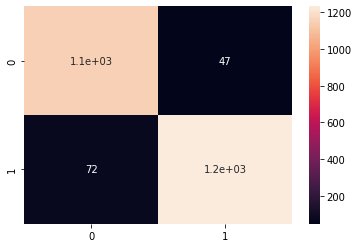

In [31]:
sns.heatmap(confusion_matrix(y_val,y_RF),annot=True)

In [32]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
y_tree=tree_model.predict(x_val)

In [33]:
accuracy_score(y_val,y_tree)

0.9332

# svc

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1195
           1       0.95      0.93      0.94      1305

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500

Model aniqligi: 0.9376


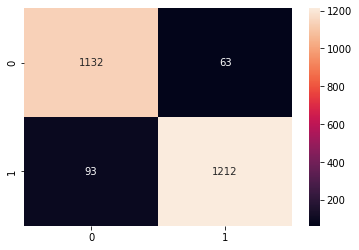

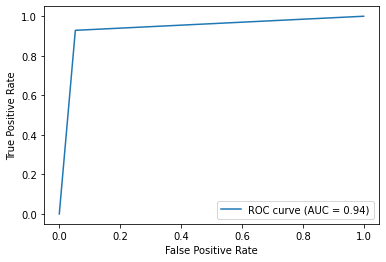

In [34]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Modelni baholaymiz

y_pred = svm_model.predict(x_val)
print(classification_report(y_val, y_pred))
print("Model aniqligi:", accuracy_score(y_val,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Logistic regression

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1195
           1       0.88      0.86      0.87      1305

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500

Model aniqligi: 0.8672


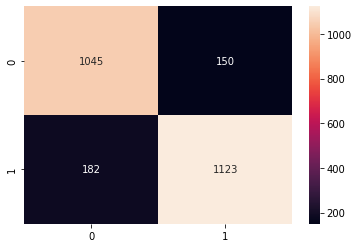

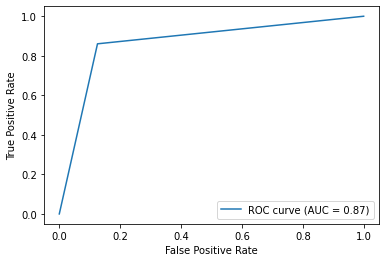

In [35]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(x_val)
print(metrics.classification_report(y_val, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_val,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Random Forest

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1195
           1       0.95      0.94      0.95      1305

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500

Model aniqligi: 0.9432


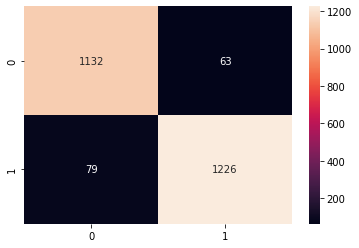

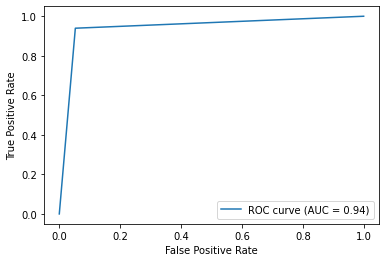

In [36]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(x_val)
print(classification_report(y_val, y_pred))
print("Model aniqligi:", accuracy_score(y_val,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# xg boost

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1195
           1       0.96      0.94      0.95      1305

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500

Model aniqligi: 0.9464


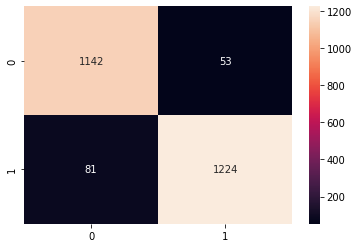

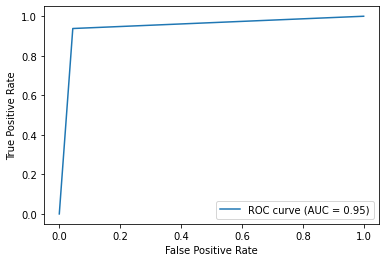

In [37]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)


y_pred = xgb_model.predict(x_val)
print(classification_report(y_val, y_pred))
print("Model aniqligi:", accuracy_score(y_val,y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [38]:
natija=pd.DataFrame(test_preds)

In [39]:
sub=pd.DataFrame({'satisfaction':test_preds})
sub

,satisfaction
0,0
1,1
2,1
3,1
4,0
...,...
3995,1
3996,0
3997,0
3998,1


In [40]:
submission=pd.merge(test_id,sub,left_index=True,right_index=True)

submission

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1


In [41]:
submission.to_csv('avikompaniya.csv',index=False)